## Comparison of Model 2 created with basic RFM model

In [1]:
# Import The Libraries
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, scipy as sp, warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
filename = 'Method2_Model.sav'
kmeans = pickle.load(open(filename, 'rb'))

In [3]:
#read prod category and rfm data
prod_cat = pd.read_pickle('PCA_RED_DESC.pkl')
rfm = pd.read_pickle('rfm.pkl')
final_data = pd.merge(prod_cat,rfm,on='Customer ID')
final_data_new = pd.merge(prod_cat,rfm,on='Customer ID')
final_data.drop(['RFM_Segment','Customer ID','R','F','M','Final_Price','RFM_Score'],axis = 'columns',inplace=True)
final_data.rename(columns={0:'0',1:'1',2:'2',3:'3',4:'4',5:'5'})

#Rescaling
numeric_columns = final_data.columns.values.tolist()
scaler = MinMaxScaler() 
final_data[numeric_columns] = scaler.fit_transform(final_data[numeric_columns])
scores_2 = []

range_values = range(1, 20)

labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(final_data)
cluster = pd.concat([final_data_new, pd.DataFrame({'cluster_final':labels})], axis = 1)
print(cluster['cluster_final'].value_counts())

0    3594
2    1503
1     781
Name: cluster_final, dtype: int64


In [4]:
#datasets for comparison
dataset=pd.read_excel('C:/Personal/NUIG/Project-DA/online_retail_II.xlsx',sheet_name=None)
data_before = dataset['Year 2009-2010']
data_after = dataset['Year 2010-2011']

In [73]:
#select one customer in both datasets
#get the cluster of that customer
#recommend top 20 customer wala thing
#remove all descriptions he already bought
#check in after dataset how many matches

In [5]:
#remove all customers with NA customer ID
data_before = data_before[data_before['Customer ID'].notna()]
data_after = data_after[data_after['Customer ID'].notna()]

In [49]:
#functions for model 1 and baseline model
def M1(customer,model,data,df):
    cluster = cluster[cluster['Customer ID'] == cust]
    #get the customers of each cluster
    if cluster['cluster_final'].item() == 0:
        d = model.transform(data)[:, 0]
    elif cluster['cluster_final'].item() == 1:
        d = model.transform(data)[:, 1]
    else:
        d = model.transform(data)[:, 2]
    return d
def M2(customer,model,data,df):
    cluster = cluster[cluster['Customer ID'] == cust]
    if cluster['cluster_final'].item() == 0:
        d = model.transform(data)[:, 0]
    elif cluster['cluster_final'].item() == 1:
        d = model.transform(data)[:, 1]
    else:
        d = model.transform(data)[:, 2]
    return d


In [67]:
def prod_recom(customer,model,data,df,M):
    percent_match = []
    for cust in customer:
        if cust in data_after['Customer ID']:
            if(M == 'M1'):
                d = M1(customer,model,data,df) #d has the customers in each cluster
            else:
                d = M2(customer,model, data,df)
            #select 20 nearest points to that cluster and get their indices
            ind = np.argsort(d)[::][:30]
            #get the data of these 30 customers
            data_recom_id = df[df.index.isin(ind)]
            #get the desc of that customer before recommending
            data_bf = data_before[data_before['Customer ID'] == cust]['Description'].apply(str).unique()
            #results of recommendation
            data_recom = data_recom_id.merge(data_before, on='Customer ID', how='left')
            descriptions=data_recom['Description'].apply(str).unique()
            
            #remove the products that are already bought
            des_final = np.setdiff1d(descriptions,data_bf)
            
            #evaluate with data_after
            data_input = df[df['Customer ID'] == cust]
            data_after_1 = data_input.merge(data_after, on='Customer ID', how='left')
            descriptions_after=data_after_1['Description'].apply(str).unique()
            percent = len([x for x in descriptions_after if x in des_final])/len(descriptions_after)
            percent_match.append(percent)
        else:
            a=1
        
    avg = sum(percent_match)/len(percent_match) #accuracy
    return avg

#### Baseline model (RFM)

In [54]:
#read prod category and rfm data
prod_cat = pd.read_pickle('PCA_RED_DESC.pkl')
rfm = pd.read_pickle('rfm.pkl')
final_data_1 = pd.merge(prod_cat,rfm,on='Customer ID')
final_data_1_new = pd.merge(prod_cat,rfm,on='Customer ID')
final_data_1.rename(columns={0:'0',1:'1',2:'2',3:'3',4:'4',5:'5'})
final_data_1.drop(['RFM_Segment','Customer ID','R','F','M','Final_Price',0,1,2,3,4,5],axis = 'columns',inplace=True)
#Rescaling
numeric_columns = final_data_1.columns.values.tolist()
scaler = MinMaxScaler() 
final_data_1[numeric_columns] = scaler.fit_transform(final_data_1[numeric_columns])
scores_2 = []

range_values = range(1, 20)

for i in range_values:
    
    kmeans_1 = KMeans(n_clusters= i)
    kmeans_1.fit(final_data_1)
    scores_2.append(kmeans_1.inertia_)
kmeans_1 = KMeans(3)
kmeans_1.fit(final_data_1)
labels_1 = kmeans_1.labels_
y_kmeans_1 = kmeans_1.fit_predict(final_data_1)
cluster_1 = pd.concat([final_data_1_new, pd.DataFrame({'cluster_final':labels_1})], axis = 1)
print(cluster_1['cluster_final'].value_counts())
silhouette_avg = silhouette_score(final_data, y_kmeans)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

1    2129
2    1985
0    1764
Name: cluster_final, dtype: int64
score de silhouette: 0.680


In [94]:
from sklearn.metrics import silhouette_samples,silhouette_score
silhouette_avg = silhouette_score(final_data_1, y_kmeans_1)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.685


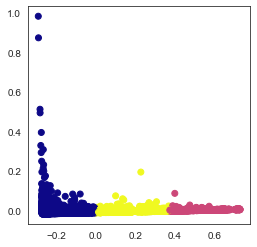

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(final_data_1)
plt.scatter(prin_comp[:,0],prin_comp[:,1],c=labels,cmap="plasma")
ax = plt.gca()
ax.set_aspect(1) 

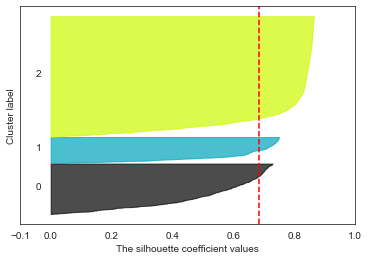

In [96]:
#reference: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
sample_silhouette_values = silhouette_samples(final_data_1, y_kmeans_1)
sns.reset_orig
sns.set_style("white")

fig, (ax1) = plt.subplots(1, 1)
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_kmeans_1 == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.grid(False)
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_aspect(1) 
plt.show()

#### Call Recommendation function for both models

In [73]:
per_list_m1 = []
per_list_m2 = []
for i in range(0,5): #5 iterations
    cust_before = (data_before.sample(n=20)['Customer ID']).tolist()
    per_list_m1.append(prod_recom(cust_before,kmeans,final_data,cluster,'M1'))
    per_list_m2.append(prod_recom(cust_before,kmeans_1,final_data_1,cluster_1,'M2'))
    

In [74]:
#accuracy for model 1
per_list_m1

[0.2394392749885469,
 0.19216987311007405,
 0.239058676584245,
 0.2310685680951811,
 0.33084445553733494]

In [76]:
#accuracy for baseline model
per_list_m2

[0.16028125705761942,
 0.0901433072408238,
 0.09445473125314874,
 0.10433965807182703,
 0.22456528579719728]